In [1]:
import numpy as np
import argparse
import os, time

from pykin.utils import plot_utils as p_utils

from pytamp.benchmark import Rearrange1

from pytamp.action.pick import PickAction
from pytamp.action.rearrangement import RearrangementAction


from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement


def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=100, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=10, help="Max depth")
    parser.add_argument("--seed", metavar="i", type=int, default=21, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('doosan', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-2f850523-acc6-40ad-8792-7dde76db72c1.json


*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can1',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('milk0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('cereal0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=ben_cube0, pos=[ 0.6068322  -0.48750704  0.84779998]),
                           Object(name=can0, pos=[ 0.28703044 -0.43226677  0.83517396]),
                           Object(name=can1, pos=[0.80422845 0.03503504 0.85059666]),
                           Object(name=milk0, pos=[0.86023026 0.45563961 0.83236691]),
                           Object(name=cereal0, pos=[

In [2]:
rearrangement1.scene_mngr.heuristic = False
pick = PickAction(rearrangement1.scene_mngr, n_contacts=10, n_directions=14)
rearr_action = RearrangementAction(rearrangement1.scene_mngr, n_sample=1)

In [3]:
pick_actions = list(pick.get_possible_actions_level_1())


In [5]:
for pick_action in pick_actions:
    for pick_scene in pick.get_possible_transitions(
        pick.scene_mngr.scene, action=pick_action
    ):
        print(pick_scene)
        rearr_place_actions = list(rearr_action.get_possible_actions_level_1(
                                    pick_scene,
                                    scene_for_sample = rearrangement1.init_scene,
                                    use_pick_action = True
                                    ))
        
        for rearr_candidate in rearr_place_actions:
            print("Rearr action",rearr_candidate)
            
            print(rearr_action.scene_mngr.scene.robot.gripper.attached_obj_name,rearr_action.scene_mngr.scene.robot.gripper.transform_bet_gripper_n_obj)
            print()

            

Rearr action {'type': 'rearr', 'rearr_obj_name': 'ben_cube0', 'place_obj_name': 'table', 'rearr_poses': [({'release': array([[ 0.22014246, -0.55019825,  0.80549313,  0.28916349],
       [-0.20720195, -0.83328195, -0.51255102,  0.4364935 ],
       [ 0.95320756, -0.05406551, -0.29744289,  0.91471435],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'pre_release': array([[ 0.22014246, -0.55019825,  0.80549313,  0.28916349],
       [-0.20720195, -0.83328195, -0.51255102,  0.4364935 ],
       [ 0.95320756, -0.05406551, -0.29744289,  1.01471435],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'post_release': array([[ 0.22014246, -0.55019825,  0.80549313,  0.20861418],
       [-0.20720195, -0.83328195, -0.51255102,  0.48774861],
       [ 0.95320756, -0.05406551, -0.29744289,  0.94445864],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}, {'table': array([[-0.06670272, -0.29502665, -0.95315792,  0.51524225],
       [ 0.99720963, -0.05180616, -0.0537

Rearr action {'type': 'rearr', 'rearr_obj_name': 'ben_cube0', 'place_obj_name': 'table', 'rearr_poses': [({'release': array([[ 0.25287187, -0.95840722, -0.13233074,  0.34963007],
       [-0.74595213, -0.28023656,  0.60417124, -0.70943045],
       [-0.61612599, -0.05406551, -0.78578985,  1.01604634],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'pre_release': array([[ 0.25287187, -0.95840722, -0.13233074,  0.34963007],
       [-0.74595213, -0.28023656,  0.60417124, -0.70943045],
       [-0.61612599, -0.05406551, -0.78578985,  1.11604634],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'post_release': array([[ 0.25287187, -0.95840722, -0.13233074,  0.36286314],
       [-0.74595213, -0.28023656,  0.60417124, -0.76984758],
       [-0.61612599, -0.05406551, -0.78578985,  1.09462533],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}, {'table': array([[-0.00703535, -0.78749955,  0.61627507,  0.49767144],
       [ 0.99724123, -0.05106704, -0.0538

Rearr action {'type': 'rearr', 'rearr_obj_name': 'ben_cube0', 'place_obj_name': 'table', 'rearr_poses': [({'release': array([[ 0.26574919,  0.95528373,  0.12965479,  0.47477051],
       [ 0.95976224, -0.24950678, -0.12885191,  0.06461781],
       [-0.09074038,  0.15868006, -0.98315147,  1.06552495],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'pre_release': array([[ 0.26574919,  0.95528373,  0.12965479,  0.47477051],
       [ 0.95976224, -0.24950678, -0.12885191,  0.06461781],
       [-0.09074038,  0.15868006, -0.98315147,  1.16552495],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'post_release': array([[ 0.26574919,  0.95528373,  0.12965479,  0.46180503],
       [ 0.95976224, -0.24950678, -0.12885191,  0.077503  ],
       [-0.09074038,  0.15868006, -0.98315147,  1.1638401 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}, {'table': array([[ 0.99498042,  0.04168789,  0.09097301,  0.50686551],
       [-0.05584191,  0.98568806,  0.1590

Rearr action {'type': 'rearr', 'rearr_obj_name': 'ben_cube0', 'place_obj_name': 'table', 'rearr_poses': [({'release': array([[-0.40449089,  0.31345954,  0.85914506,  0.67320388],
       [-0.00435632,  0.9387555 , -0.34455644, -0.12394311],
       [-0.91453165, -0.14311265, -0.37835252,  0.94244935],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'pre_release': array([[-0.40449089,  0.31345954,  0.85914506,  0.67320388],
       [-0.00435632,  0.9387555 , -0.34455644, -0.12394311],
       [-0.91453165, -0.14311265, -0.37835252,  1.04244935],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'post_release': array([[-0.40449089,  0.31345954,  0.85914506,  0.58728937],
       [-0.00435632,  0.9387555 , -0.34455644, -0.08948747],
       [-0.91453165, -0.14311265, -0.37835252,  0.9802846 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}, {'table': array([[-0.09477804,  0.39314291,  0.91457956,  0.506904  ],
       [-0.9850814 ,  0.09552061, -0.1431

IndexError: list index out of range

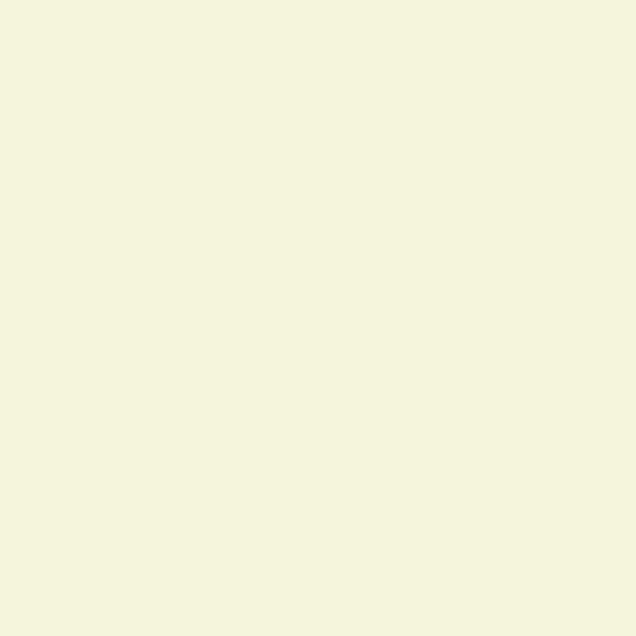

In [4]:
fig, ax = p_utils.init_3d_figure(name="Level wise 1")
for pick_action in pick_actions:
    for all_grasp_pose in pick_action[pick.info.GRASP_POSES]:
        pick.scene_mngr.set_gripper_pose(all_grasp_pose[pick.move_data.MOVE_grasp])
        pick.scene_mngr.render_axis(ax, all_grasp_pose[pick.move_data.MOVE_grasp])
pick.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
pick.show()

In [7]:
rearrangement1.init_scene._objects

{'support_object': <trimesh.Trimesh(vertices.shape=(32, 3), faces.shape=(48, 3))>,
 'ben_cube0': <trimesh.Trimesh(vertices.shape=(8, 3), faces.shape=(12, 3))>,
 'can0': <trimesh.Trimesh(vertices.shape=(511, 3), faces.shape=(956, 3))>,
 'can1': <trimesh.Trimesh(vertices.shape=(511, 3), faces.shape=(956, 3))>,
 'milk0': <trimesh.Trimesh(vertices.shape=(123, 3), faces.shape=(242, 3))>,
 'cereal0': <trimesh.Trimesh(vertices.shape=(59, 3), faces.shape=(114, 3))>}

In [8]:
pick_action

{'type': 'pick',
 'pick_obj_name': 'cereal0',
 'grasp_poses': [{'grasp': array([[-0.01606933,  0.99940199,  0.03061755,  0.64800145],
          [ 0.98766298,  0.02063615, -0.15522882,  0.01115118],
          [-0.15576782,  0.0277454 , -0.98740396,  1.0352062 ],
          [ 0.        ,  0.        ,  0.        ,  1.        ]]),
   'pre_grasp': array([[-0.01606933,  0.99940199,  0.03061755,  0.64493969],
          [ 0.98766298,  0.02063615, -0.15522882,  0.02667407],
          [-0.15576782,  0.0277454 , -0.98740396,  1.1339466 ],
          [ 0.        ,  0.        ,  0.        ,  1.        ]]),
   'post_grasp': array([[-0.01606933,  0.99940199,  0.03061755,  0.64800145],
          [ 0.98766298,  0.02063615, -0.15522882,  0.01115118],
          [-0.15576782,  0.0277454 , -0.98740396,  1.1352062 ],
          [ 0.        ,  0.        ,  0.        ,  1.        ]])},
  {'grasp': array([[-0.02845737,  0.99940199,  0.01964271,  0.65027873],
          [ 0.94667057,  0.02063615,  0.32154158, -0.08